In [1]:
import os
import json
import requests
import pandas as pd
import requests
import alpaca_trade_api as tradeapi 
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import yfinance as yf
import warnings

%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()


True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [4]:
NVDA_df = yf.download('NVDA', start='2018-11-07', end='2023-11-07')
display(NVDA_df.tail())
display(NVDA_df.head())

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-31,404.500000,408.790009,392.299988,407.799988,407.799988,51796900
2023-11-01,408.839996,423.809998,408.690002,423.250000,423.250000,43759300
2023-11-02,433.279999,438.839996,428.940002,435.059998,435.059998,40917200
2023-11-03,440.200012,453.089996,437.230011,450.049988,450.049988,42385500
2023-11-06,452.850006,459.350006,448.989990,457.510010,457.510010,40073300


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-07,53.437500,54.352501,52.794998,53.447498,52.983994,48381200
2018-11-08,52.849998,52.857498,50.957500,51.497501,51.050907,51135200
2018-11-09,50.599998,52.330002,50.259998,51.417500,50.971596,41324000
2018-11-12,50.494999,50.717499,47.165001,47.384998,46.974068,61711600
2018-11-13,48.372501,51.052502,48.310001,49.827499,49.395382,64471200


In [5]:
stock = yf.Ticker("NVDA")

#retrieve daily data
NVDA_df = stock.history(period="max", interval="1d")

#close = NVDA_df.Close.round(2)

#reset the index
NVDA_df = NVDA_df.reset_index()

#print the columns
#print(df.columns)

#remove the columns 6 & 7
NVDA_df.drop(NVDA_df.columns[[6,7]], axis=1, inplace=True)

#print the remaining columns
#print(NVDA_df.columns)
display(NVDA_df.tail())
display(NVDA_df.head())
print(NVDA_df.columns)

,Date,Open,High,Low,Close,Volume
6237,2023-11-03 00:00:00-04:00,440.200012,453.089996,437.230011,450.049988,42385500
6238,2023-11-06 00:00:00-05:00,452.850006,459.350006,448.989990,457.510010,40073300
6239,2023-11-07 00:00:00-05:00,457.190002,462.179993,451.579987,459.549988,34316500
6240,2023-11-08 00:00:00-05:00,461.000000,468.670013,459.679993,465.739990,34671900
6241,2023-11-09 00:00:00-05:00,474.670013,482.299988,467.500000,469.500000,52011854


,Date,Open,High,Low,Close,Volume
0,1999-01-22 00:00:00-05:00,0.401374,0.447962,0.355981,0.376288,271468800
1,1999-01-25 00:00:00-05:00,0.406152,0.420487,0.376288,0.415709,51048000
2,1999-01-26 00:00:00-05:00,0.420487,0.428849,0.377482,0.383456,34320000
3,1999-01-27 00:00:00-05:00,0.384650,0.394207,0.363147,0.382261,24436800
4,1999-01-28 00:00:00-05:00,0.382261,0.384650,0.378677,0.381067,22752000


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [6]:
tickers = ['NVDA']
for ticker in tickers:
    ticker_yahoo = yf.Ticker(ticker)
    data = ticker_yahoo.history()
    last_quote = data['Close'].iloc[-1]
    print(ticker, last_quote)

NVDA 469.5


In [7]:
stock_budget = 2500

In [8]:

NVDA_shares = stock_budget/last_quote
NVDA_shares

5.324813631522897

In [9]:
my_NVDA_shares = last_quote * NVDA_shares
my_NVDA_shares

2500.0

In [10]:
print(f"The current value of your {NVDA_shares:0.2f} NVDA is ${my_NVDA_shares:0.2f}")


The current value of your 5.32 NVDA is $2500.00


In [11]:
#Set current amount of shares
my_NVDA_shares

2500.0

In [12]:
ticker = "NVDA"

In [13]:
timeframe = '1Day'

In [14]:
start_date = pd.Timestamp("2018-11-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2023-11-07", tz="America/New_York").isoformat()

In [15]:
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df

In [16]:
ticker_data = pd.concat([ticker_data], axis=1, keys=["NVDA"])
ticker_data.head()

NVDA                                        \
                            close    high       low trade_count    open   
timestamp                                                                 
2018-11-07 05:00:00+00:00  213.79  217.41  211.1800      114599  213.75   
2018-11-08 05:00:00+00:00  205.99  211.43  203.8300      115011  211.40   
2018-11-09 05:00:00+00:00  205.67  209.32  201.0400      100199  202.40   
2018-11-12 05:00:00+00:00  189.54  202.87  188.6600      166735  201.98   
2018-11-13 05:00:00+00:00  199.31  204.21  193.2369      151766  193.49   

                                                 
                             volume        vwap  
timestamp                                        
2018-11-07 05:00:00+00:00  12590436  214.304857  
2018-11-08 05:00:00+00:00  13193381  207.026734  
2018-11-09 05:00:00+00:00  10878986  205.340718  
2018-11-12 05:00:00+00:00  15898628  192.116943  
2018-11-13 05:00:00+00:00  16639394  198.944712

In [17]:
NVDA_shares_simulation_1 = MCSimulation(
     portfolio_data = ticker_data,
     num_simulation= 500,
     num_trading_days = 252 * 1)

In [18]:
warnings.filterwarnings("ignore")
NVDA_shares_simulation_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.011495,0.962521,0.981929,0.993571,1.028057,0.929958,0.964102,1.033037,1.023877,0.937055,...,1.036656,0.960585,0.977242,0.945804,0.979574,0.972492,1.047299,0.989043,0.906856,0.995313
2,1.060324,0.900900,1.001531,1.022080,0.989591,0.898769,1.009032,1.114448,0.965420,0.963907,...,0.999863,0.952423,1.067747,0.940362,1.033821,0.921775,1.070361,1.091912,0.913416,1.003502
3,1.027504,0.876044,0.995944,1.098098,1.072664,0.853691,0.971475,1.050413,0.989574,0.876797,...,1.020795,0.860428,1.018963,0.906416,1.039089,0.880496,1.071592,1.068493,0.898894,0.877911
4,1.142577,0.896500,0.945976,1.100864,1.102856,0.789185,1.003656,1.094822,0.922643,0.925644,...,1.015301,0.838801,1.048445,0.959623,0.995550,0.851768,1.032008,1.090441,0.921640,0.882399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.985169,0.456764,0.927126,1.335446,1.976249,0.766617,0.827930,0.467562,1.331031,0.890008,...,2.992784,1.720686,1.278611,2.590240,0.817155,1.069515,0.248594,1.818897,2.187734,1.010172
249,1.022761,0.477052,0.901603,1.390726,2.034456,0.782180,0.867764,0.469187,1.345931,0.897064,...,2.935330,1.738345,1.326252,2.542360,0.784792,1.018858,0.241302,1.885380,2.116263,1.056688
250,1.062048,0.472442,0.923941,1.399903,1.939212,0.806667,0.893046,0.470734,1.309349,0.919867,...,3.102568,1.688617,1.324592,2.396522,0.795333,1.046284,0.253377,1.845893,2.131651,1.095874
251,1.066639,0.457964,0.912169,1.359172,1.939301,0.846652,0.884062,0.455266,1.283104,0.869867,...,3.281170,1.784237,1.342724,2.490177,0.762527,1.026450,0.255625,1.920371,2.110083,1.106318


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

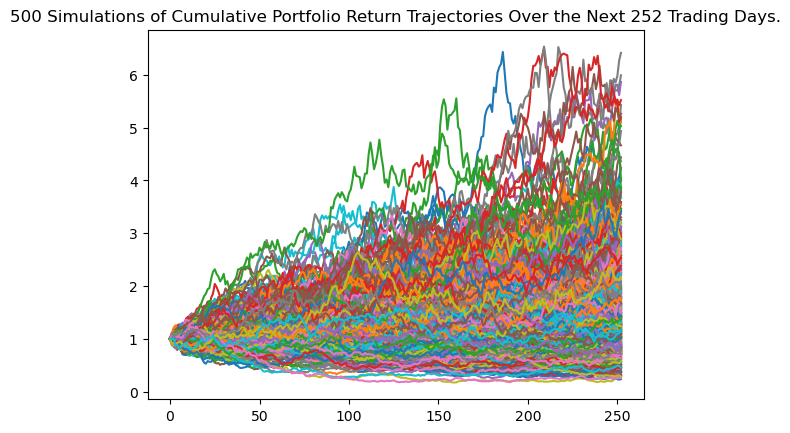

In [19]:
NVDA_shares_simulation_1.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

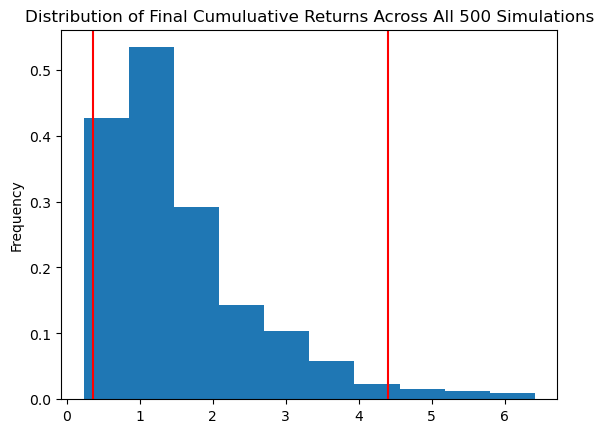

In [20]:
NVDA_shares_simulation_1.plot_distribution()

In [21]:
tbl = NVDA_shares_simulation_1.summarize_cumulative_return()
tbl

count           500.000000
mean              1.580063
std               1.057086
min               0.236035
25%               0.841941
50%               1.281168
75%               1.939889
max               6.415955
95% CI Lower      0.365044
95% CI Upper      4.400433
Name: 252, dtype: float64

In [22]:
# Set initial investment
initial_investment = 2500

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $2500
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 1 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $2500 in the portfolio over the next 1 years will end within in the range of $912.61 and $11001.08


In [23]:
NVDA_shares_simulation_3 = MCSimulation(
     portfolio_data = ticker_data,
     num_simulation= 500,
     num_trading_days = 252 * 3)

In [24]:
warnings.filterwarnings("ignore")
NVDA_shares_simulation_3.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.963728,1.029894,0.942335,1.010190,0.944504,0.973201,0.964478,0.966422,0.997583,0.984268,...,1.038058,0.977267,0.968219,0.957141,1.032151,0.898101,0.968521,1.007243,1.018900,0.919748
2,1.045656,1.083702,0.970038,1.026170,0.955954,0.979754,1.004465,0.963568,0.991626,1.027100,...,1.019263,0.959244,0.989529,0.930730,0.994238,0.900209,1.049337,0.959280,1.058125,0.914449
3,1.033491,1.069669,1.031361,0.918341,0.941115,0.959658,0.976130,0.939677,1.002002,0.950351,...,1.016114,0.916613,1.000946,0.986419,0.970938,0.967803,1.036692,0.998612,1.083769,0.977601
4,1.031234,1.105368,1.042743,0.893170,0.968154,0.905765,0.967470,0.982839,1.046756,0.966544,...,0.973083,0.866008,0.994621,0.977865,0.911868,0.988741,1.021649,0.937576,1.136600,0.945493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,4.385856,0.650287,1.965425,3.473443,2.451167,1.089028,4.672437,0.336423,8.892213,1.711107,...,0.387592,0.278907,1.267172,9.385395,1.002770,0.196613,1.299440,2.268482,6.305767,1.080791
753,4.618991,0.640912,1.961623,3.383227,2.458566,0.971726,4.691296,0.316829,8.163170,1.763383,...,0.390645,0.268650,1.332577,9.345223,0.961813,0.189824,1.321626,2.262590,6.753693,0.985739
754,4.617441,0.629817,1.855348,3.207049,2.526005,0.946563,4.696670,0.306674,8.750937,1.659537,...,0.383812,0.271792,1.358806,9.687226,0.989408,0.188298,1.368092,2.367488,6.569098,1.006858
755,5.198786,0.616723,1.932178,3.298795,2.596847,0.933843,4.527063,0.303608,8.776206,1.697991,...,0.373655,0.257806,1.369444,9.644028,1.054647,0.192919,1.412327,2.390174,6.616557,0.984547


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 756 Trading Days.'}>

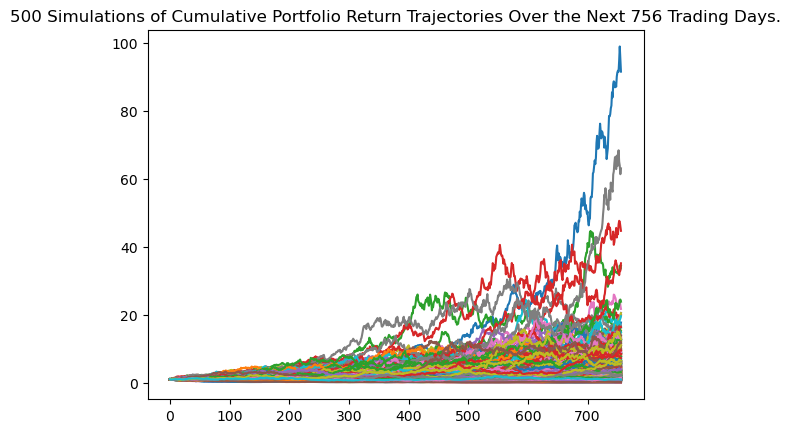

In [25]:
NVDA_shares_simulation_3.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

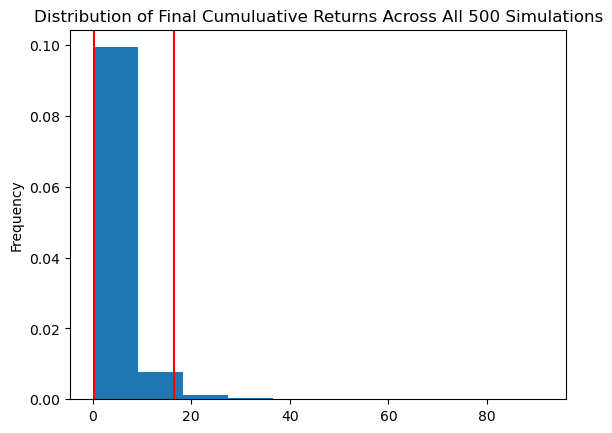

In [26]:
NVDA_shares_simulation_3.plot_distribution()

In [27]:
tbl_2 = NVDA_shares_simulation_3.summarize_cumulative_return()
tbl_2

count           500.000000
mean              3.969822
std               6.676131
min               0.065143
25%               1.001135
50%               2.060922
75%               4.469511
max              91.490755
95% CI Lower      0.262705
95% CI Upper     16.539539
Name: 756, dtype: float64

In [28]:
# Set initial investment
initial_investment = 2500

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $2500
ci_lower = round(tbl_2[8]*initial_investment,2)
ci_upper = round(tbl_2[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 3 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $2500 in the portfolio over the next 3 years will end within in the range of $656.76 and $41348.85


In [29]:
NVDA_shares_simulation_5 = MCSimulation(
     portfolio_data = ticker_data,
     num_simulation= 500,
     num_trading_days = 252 * 5)

In [44]:
def risk_simulation(ticker, years):
    # Set Alpaca API key and secret
    alpaca_api_key = os.getenv("ALPACA_API_KEY")
    alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

    #print(f"Alpaca Key type: {type(alpaca_api_key)}")
    #print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

    # Create the Alpaca API object
    api = tradeapi.REST(
        alpaca_api_key,
        alpaca_secret_key,
        api_version="v2"
    )
    
    NVDA_df = yf.download(ticker, start='2018-11-07', end='2023-11-07')
    stock = yf.Ticker(ticker)

    #retrieve daily data
    NVDA_df = stock.history(period="max", interval="1d")

    #close = NVDA_df.Close.round(2)

    #reset the index
    NVDA_df = NVDA_df.reset_index()

    #print the columns
    #print(df.columns)

    #remove the columns 6 & 7
    NVDA_df.drop(NVDA_df.columns[[6,7]], axis=1, inplace=True)

    #print the remaining columns
    print(NVDA_df.columns)
    #return((NVDA_df.tail()))
    
    tickers = [ticker]
    for ticker in tickers:
        ticker_yahoo = yf.Ticker(ticker)
        data = ticker_yahoo.history()
        last_quote = data['Close'].iloc[-1]
    print(ticker, last_quote)
    
    stock_budget = 2500
    
    NVDA_shares = stock_budget/last_quote
    NVDA_shares
    
    my_NVDA_shares = last_quote * NVDA_shares
    my_NVDA_shares
    
    print(f"The current value of your {NVDA_shares:0.2f} {ticker} is ${my_NVDA_shares:0.2f}")
    
    my_NVDA_shares
    
    ticker = ticker
    timeframe = '1Day'
    
    start_date = pd.Timestamp("2018-11-07", tz="America/New_York").isoformat()
    end_date = pd.Timestamp("2023-11-07", tz="America/New_York").isoformat()
    
    ticker_data = api.get_bars(
        ticker,
        timeframe,
        start=start_date,
        end=end_date
    ).df
    
    ticker_data = pd.concat([ticker_data], axis=1, keys=[ticker])
    ticker_data.head()
    
    NVDA_shares_simulation_1 = MCSimulation(
     portfolio_data = ticker_data,
     num_simulation= 500,
     num_trading_days = 252 * years)
    
    warnings.filterwarnings("ignore")
    NVDA_shares_simulation_1.calc_cumulative_return()
    
    NVDA_shares_simulation_1.plot_simulation()
    
    #NVDA_shares_simulation_3.plot_distribution()
    
    #tbl_2 = NVDA_shares_simulation_3.summarize_cumulative_return()
    #tbl_2
    
    # Set initial investment
    initial_investment = 2500

    # Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $2500
    ci_lower = round(tbl_2[8]*initial_investment,2)
    ci_upper = round(tbl_2[9]*initial_investment,2)

    # Print results
    print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next {years} years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")
    #return((NVDA_df.head()))
    

[*********************100%%**********************]  1 of 1 completed
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')
NVDA 469.5
The current value of your 5.32 NVDA is $2500.00
Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation numb

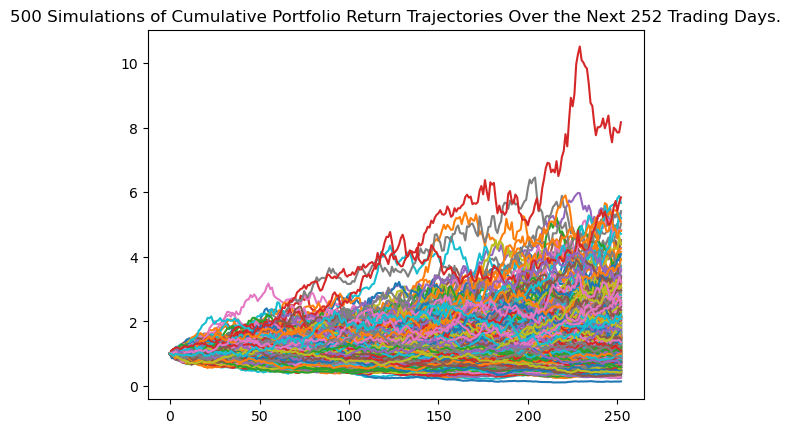

In [45]:
a = risk_simulation(ticker='NVDA', years=1)

In [33]:
a